In [1]:
# 시그모이드 함수

In [11]:
# KNN모델 활용 분류
import pandas as pd
fish = pd.read_csv("http://bit.ly/fish_csv_data")

print(pd.unique(fish['Species'])) # 열에서 고유한 값 출력

#fish의 종류를 타깃 데이터, 나머지 특성을 입력 데이터
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#훈련세트와 테스트세트로 나눠주기
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

#입력 데이터 전처리 standard
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [13]:
# knn 모델 훈련
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [14]:
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [15]:
# pridict_proba() 메서드는 클래스별 확률값을 반환한다.
# Numpy의 round()는 반올림 함수이며 decimals 매개변수는 유지할 소수점 아래 자리를 지정
import numpy as np
# 클래스별 확률값 반환
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4)) #소숫점 4자리까지 반올림해 반환
# 4번째 샘플의 경우 Perch일 확률이 2/3, Roach일 확률이 1/3

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [16]:
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])
# 번째 샘플의 이웃은 Perch가 2개, Roach가 1개로, 구한 확률이 맞음

[['Roach' 'Perch' 'Perch']]


In [3]:
# 로지스틱 회귀 (시그모이드 함수)
# 로지스틱 회귀분석 또는 Neural network의 Binary classification 활성화 함수
# 레이어의 0에 수렴하는 기울기 소실 발생 위험
# 활성화 함수(Activation function) : 입력된 데이터의 가중 합을 출력 신호로 변환하는 함수

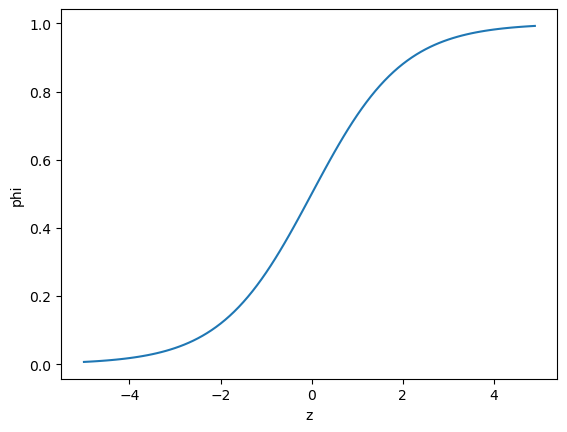

In [19]:
import numpy as np
import matplotlib.pyplot as plt
z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()
# 이진 분류에서 시그모이드 출력이 0.5보다 크면 양성클래스, 작으면 음성클래스

In [21]:
# 불리언 인덱싱으로 도미와 빙어 데이터를 선별
bream_smelt_indexes = (train_target == "Bream") | (train_target == "Smelt")
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [22]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [23]:
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [24]:
print(lr.predict_proba(train_bream_smelt[:5]))

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [26]:
# 로지스틱 회귀가 학습한 계수
print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [27]:
# z값과 시그모이드 함수 값
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

from scipy.special import expit
print(expit(decisions))

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]
[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


In [28]:
# 번외 : 다중분류
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [29]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [30]:
print(lr.classes_)
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [31]:
# use 소프트맥스함수

In [32]:
from scipy.special import softmax

decision = lr.decision_function(test_scaled[:5]) #샘플의 z값 계산
proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3)) #각 행의 확률의 합은 1

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
